# 1. Importação das bibliotecas

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# 2. Carregamento do dataset

In [2]:
df = pd.read_csv('dataset_sudeste_simples_realista_outliers-1k.csv')
display(df)

,id,idade,renda,cidade,categoria,nota,feedback
0,1,31.0,2234.80,Belo Horizonte,B,3.7,Regular
1,2,NaN,2537.00,São Paulo,A,0.2,Ruim
2,3,47.0,12155.01,Vitória,B,8.3,Ruim
3,4,35.0,7554.11,Belo Horizonte,B,5.0,Bom
4,5,62.0,3817.81,Belo Horizonte,B,8.4,Bom
...,...,...,...,...,...,...,...
995,996,22.0,4910.70,Rio de Janeiro,A,8.9,Regular
996,997,44.0,10027.96,Vitória,A,0.1,Regular
997,998,60.0,12438.44,Belo Horizonte,A,5.9,Bom
998,999,69.0,7476.94,Belo Horizonte,A,9.4,Regular


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1000 non-null   int64  
 1   idade      992 non-null    float64
 2   renda      987 non-null    float64
 3   cidade     991 non-null    object 
 4   categoria  990 non-null    object 
 5   nota       992 non-null    float64
 6   feedback   996 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [6]:
df.describe()

,id,idade,renda,nota
count,1000.000000,992.000000,987.000000,992.000000
mean,500.500000,41.869960,7255.611773,4.981754
std,288.819436,16.473084,4126.515393,2.908348
min,1.000000,3.000000,534.520000,-4.900000
25%,250.750000,28.000000,4298.600000,2.600000
50%,500.500000,41.000000,7016.750000,5.000000
75%,750.250000,55.000000,10066.245000,7.300000
max,1000.000000,114.000000,46707.820000,13.600000


In [7]:
df.isnull().sum()

id            0
idade         8
renda        13
cidade        9
categoria    10
nota          8
feedback      4
dtype: int64

# 3. Uso do Simple Imputer para substituição dos valores nulos

In [11]:
#Uso da média para preenchimento dos nulos de idade e nota
imputer_media = SimpleImputer(strategy='mean')
df[['idade', 'nota']] = imputer_media.fit_transform(df[['idade', 'nota']])

In [12]:
#Uso da mediana para preenchimento dos nulos de renda
imputer_mediana = SimpleImputer(strategy='median')
df[['renda']] = imputer_mediana.fit_transform(df[['renda']])

# 4. Geração de Boxplot para verificação de outliers

## 4.1 - Idade

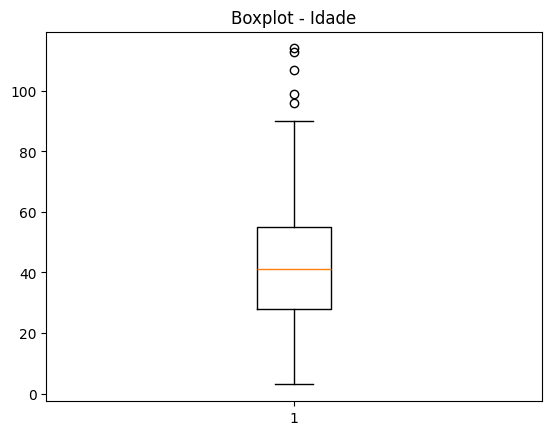

In [21]:
# Geração do Gráfico
plt.boxplot(df['idade'])
plt.title("Boxplot - Idade")
plt.show()

## 4.2 - Nota

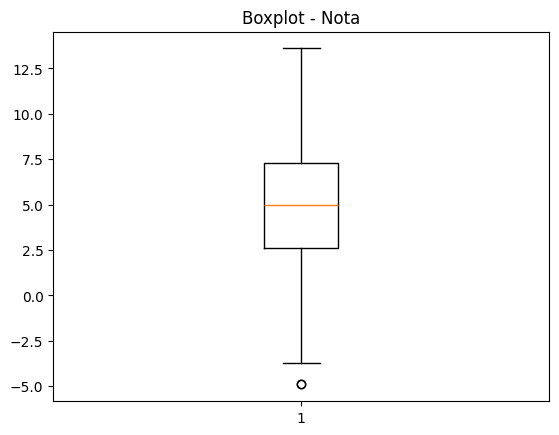

In [22]:
# Geração do Gráfico
plt.boxplot(df['nota'])
plt.title("Boxplot - Nota")
plt.show()

## 4.3 - Renda

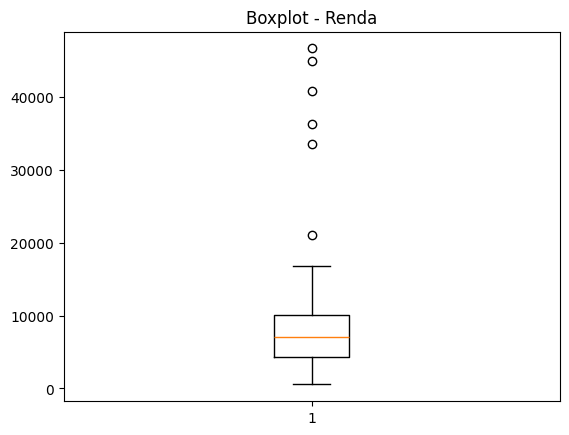

In [23]:
# Geração do Gráfico
plt.boxplot(df['renda'])
plt.title("Boxplot - Renda")
plt.show()

# 5. Encoder

In [24]:
# Realiza a códificação das coluas
#encoder = OneHotEncoder(sparse_output=False, drop='first')  
encoder = OneHotEncoder(sparse_output=False)  

#categorias_codificadas = encoder.fit_transform(df[['cidade', 'categoria', 'feedback']])
categorias_codificadas = encoder.fit_transform(df[['cidade']])

# Converter os resultados do encoding para um DataFrame
#df_categorias = pd.DataFrame(categorias_codificadas, columns=encoder.get_feature_names_out(['cidade', 'categoria', 'feedback']))
df_categorias = pd.DataFrame(categorias_codificadas, columns=encoder.get_feature_names_out(['cidade']))

# Resetar o índice do df original e concatenar com as novas colunas
df_final = pd.concat([df.reset_index(drop=True), df_categorias], axis=1)

# Remover as colunas categóricas originais (sem usar inplace)
#df_final = df_final.drop(['cidade', 'categoria', 'feedback'], axis=1)
df_final = df_final.drop(['cidade'], axis=1)

In [25]:
display(df_final)

,id,idade,renda,categoria,nota,feedback,cidade_Belo Horizonte,cidade_Rio de Janeiro,cidade_São Paulo,cidade_Vitória,cidade_nan
0,1,31.00000,2234.80,B,3.7,Regular,1.0,0.0,0.0,0.0,0.0
1,2,41.86996,2537.00,A,0.2,Ruim,0.0,0.0,1.0,0.0,0.0
2,3,47.00000,12155.01,B,8.3,Ruim,0.0,0.0,0.0,1.0,0.0
3,4,35.00000,7554.11,B,5.0,Bom,1.0,0.0,0.0,0.0,0.0
4,5,62.00000,3817.81,B,8.4,Bom,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,22.00000,4910.70,A,8.9,Regular,0.0,1.0,0.0,0.0,0.0
996,997,44.00000,10027.96,A,0.1,Regular,0.0,0.0,0.0,1.0,0.0
997,998,60.00000,12438.44,A,5.9,Bom,1.0,0.0,0.0,0.0,0.0
998,999,69.00000,7476.94,A,9.4,Regular,1.0,0.0,0.0,0.0,0.0


# 6. Normalização das colunas idade, renda e nota

In [26]:
scaler = StandardScaler()
df_final[['idade', 'renda', 'nota']] = scaler.fit_transform(df_final[['idade', 'renda', 'nota']])

In [27]:
display(df_final)

,id,idade,renda,categoria,nota,feedback,cidade_Belo Horizonte,cidade_Rio de Janeiro,cidade_São Paulo,cidade_Vitória,cidade_nan
0,1,-6.628514e-01,-1.224543,B,-0.442712,Regular,1.0,0.0,0.0,0.0,0.0
1,2,-4.332898e-16,-1.150792,A,-1.651597,Ruim,0.0,0.0,1.0,0.0,0.0
2,3,3.128305e-01,1.196428,B,1.146108,Ruim,0.0,0.0,0.0,1.0,0.0
3,4,-4.189310e-01,0.073605,B,0.006302,Bom,1.0,0.0,0.0,0.0,0.0
4,5,1.227532e+00,-0.838218,B,1.180647,Bom,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,-1.211673e+00,-0.571504,A,1.353345,Regular,0.0,1.0,0.0,0.0,0.0
996,997,1.298901e-01,0.677333,A,-1.686137,Regular,0.0,0.0,0.0,1.0,0.0
997,998,1.105572e+00,1.265597,A,0.317158,Bom,1.0,0.0,0.0,0.0,0.0
998,999,1.654393e+00,0.054772,A,1.526043,Regular,1.0,0.0,0.0,0.0,0.0


In [28]:
df_final[['idade','renda','nota']].describe()

,idade,renda,nota
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.877698e-16,-1.207923e-16,9.237056e-17
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.370295e+00,-1.639486e+00,-3.413115e+00
25%,-8.457918e-01,-7.135321e-01,-8.226475e-01
50%,-5.305024e-02,-5.753504e-02,6.302078e-03
75%,8.006714e-01,6.791443e-01,8.007121e-01
max,4.398498e+00,9.628843e+00,2.976705e+00


In [30]:
df_final.to_csv('dataset_sudeste_simples_realista_outliers-1k-fase1.csv', index=False)